Index(['sentiment', 'content', 'Unnamed: 2'], dtype='object')


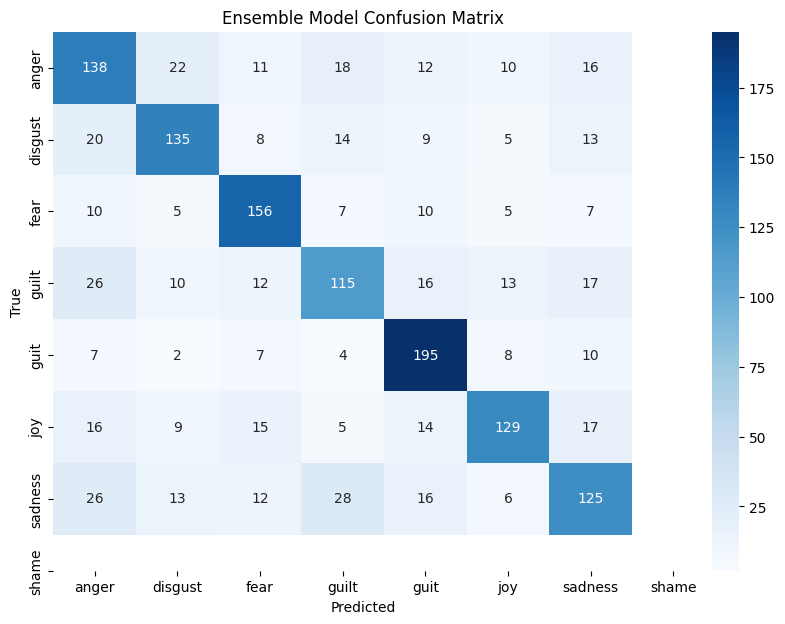

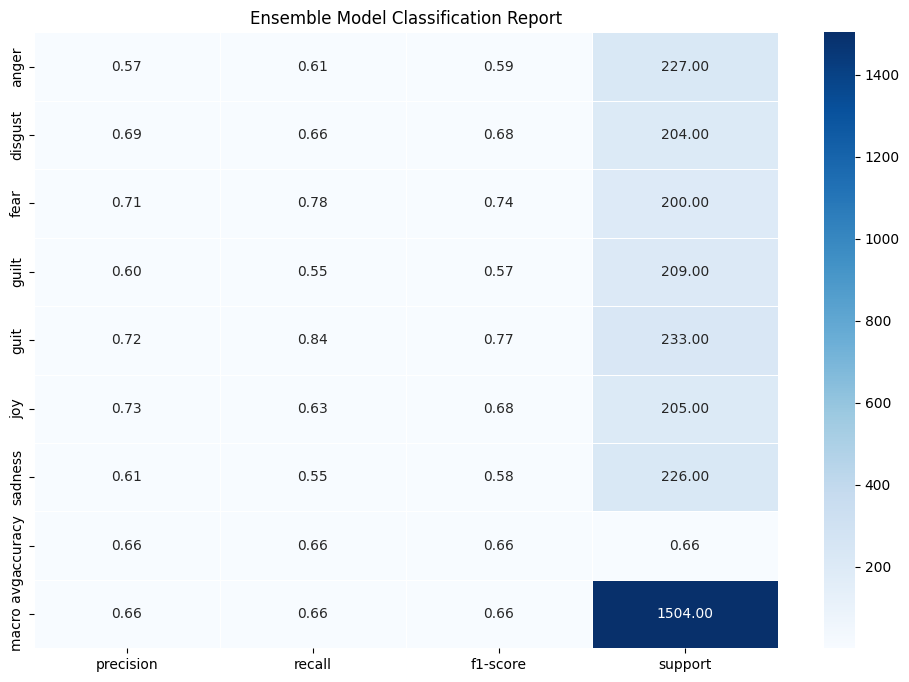

Ensemble Model Performance
Accuracy: 0.6602393617021277
Precision: 0.6602393617021277
Recall: 0.6602393617021277
F1 Score: 0.6602393617021277
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       227
           1       0.69      0.66      0.68       204
           2       0.71      0.78      0.74       200
           3       0.60      0.55      0.57       209
           5       0.72      0.84      0.77       233
           6       0.73      0.63      0.68       205
           7       0.61      0.55      0.58       226

    accuracy                           0.66      1504
   macro avg       0.66      0.66      0.66      1504
weighted avg       0.66      0.66      0.66      1504



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:\Users\Rakshitha\Desktop\mini prj ML\ISEAR_dataset.csv"
df = pd.read_csv(file_path)

# Display the columns to verify correct names
print(df.columns)

# Text preprocessing: Remove punctuation and join words
df['content'] = df['content'].apply(lambda text: " ".join(text.replace(r'[^\w\s]', '') for text in text.split()))

# Vectorization of text data
count_vect = CountVectorizer()
X = count_vect.fit_transform(df['content'])

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train a Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train a Logistic Regression Classifier
logr_model = LogisticRegression(max_iter=200)
logr_model.fit(X_train, y_train)
y_pred_logr = logr_model.predict(X_test)

# Stack predictions from each model
X_meta = np.array([y_pred_dt, y_pred_svm, y_pred_logr]).T

# Train a meta-learner using Random Forest
meta_learner = RandomForestClassifier()
meta_learner.fit(X_meta, y_test)
ensemble_predictions = meta_learner.predict(X_meta)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to plot the classification report
def plot_classification_report(y_true, y_pred, title='Classification Report'):
    # Get unique classes from the true labels
    classes = np.unique(y_true)
    
    # Generate and format the classification report
    report = classification_report(y_true, y_pred, target_names=label_encoder.classes_[:len(classes)], 
                                   labels=classes, output_dict=True, zero_division=0)
    
    df_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_report.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
    plt.title(title)
    plt.show()

# Plot confusion matrix and classification report for the ensemble model
plot_confusion_matrix(y_test, ensemble_predictions, title='Ensemble Model Confusion Matrix')
plot_classification_report(y_test, ensemble_predictions, title='Ensemble Model Classification Report')

# Function to display performance metrics
def display_performance_table(y_true, y_pred, title='Performance Table'):
    print(title)
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, average='micro'))
    print('Recall:', recall_score(y_true, y_pred, average='micro'))
    print('F1 Score:', f1_score(y_true, y_pred, average='micro'))
    print(classification_report(y_true, y_pred))

# Display performance metrics for the ensemble model
display_performance_table(y_test, ensemble_predictions, title='Ensemble Model Performance')
